In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 경로 설정 
import os
os.chdir('/content/drive/MyDrive/A2W/데이터/data_submission')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

In [6]:
df1 = pd.read_csv("y_sum_hg_all.csv")
df2 = pd.read_csv('tree_sum_final.csv', encoding = 'cp949')

In [7]:
df1

,Unnamed: 0,umd,sgg,umd2,sum_cnt,landslide,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD
0,0,개진면,고령군,고령군 개진면,0.0,0.0,2,24,306.1,18.7,158.6,3,12,1,1,20,2,1
1,1,성산면,고령군,고령군 성산면,0.0,0.0,2,26,103.2,13.4,244.5,3,12,1,1,10,2,1
2,2,우곡면,고령군,고령군 우곡면,1.0,1.0,2,24,64.1,17.7,285.2,3,7,1,1,10,3,13
3,3,각북면,청도군,청도군 각북면,0.0,0.0,1,12,573.4,22.5,15.5,3,12,1,1,10,2,1
4,4,이서면,청도군,청도군 이서면,0.0,0.0,2,26,249.5,15.1,86.6,3,12,1,1,10,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,신안동,진주시,진주시 신안동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0
633,633,충무공동,진주시,진주시 충무공동,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0
634,634,욕지면,통영시,통영시 욕지면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0
635,635,사량면,통영시,통영시 사량면,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [9]:
df2

,umd,sgg,umd2,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT
0,부계면,군위군,군위군 부계면,1,2,1,11,2,4,C,12
1,우보면,군위군,군위군 우보면,1,2,1,11,2,4,C,12
2,산성면,군위군,군위군 산성면,1,2,1,11,2,4,C,12
3,신녕면,영천시,영천시 신녕면,1,2,2,30,1,3,C,10
4,화산면,영천시,영천시 화산면,1,2,2,30,1,3,C,10
...,...,...,...,...,...,...,...,...,...,...,...
620,야로면,합천군,합천군 야로면,1,2,1,11,2,5,C,12
621,묘산면,합천군,합천군 묘산면,1,2,2,34,2,5,C,12
622,덕곡면,합천군,합천군 덕곡면,1,2,1,11,2,4,C,12
623,청덕면,합천군,합천군 청덕면,1,2,1,11,2,4,C,12


In [13]:
df_sample1 = df1.drop(["Unnamed: 0", 'umd', "sgg", "sum_cnt"], axis=1)

In [23]:
df_sample2 = df2.drop(['umd', "sgg", "DNST_CD"], axis=1)

In [24]:
merge_outer = pd.merge(df_sample1,df_sample2, how='outer',on='umd2')
merge_outer

,umd2,landslide,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT
0,고령군 개진면,0.0,2,24,306.1,18.7,158.6,3,12,1,1,20,2,1,1.0,1.0,3.0,77.0,0.0,1.0,0.0
1,고령군 성산면,0.0,2,26,103.2,13.4,244.5,3,12,1,1,10,2,1,1.0,1.0,3.0,77.0,0.0,1.0,0.0
2,고령군 우곡면,1.0,2,24,64.1,17.7,285.2,3,7,1,1,10,3,13,1.0,2.0,1.0,11.0,2.0,4.0,14.0
3,청도군 각북면,0.0,1,12,573.4,22.5,15.5,3,12,1,1,10,2,1,1.0,2.0,1.0,11.0,2.0,4.0,14.0
4,청도군 이서면,0.0,2,26,249.5,15.1,86.6,3,12,1,1,10,2,1,1.0,2.0,2.0,30.0,2.0,4.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,진주시 신안동,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,진주시 충무공동,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,3.0,10.0
634,통영시 욕지면,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,2.0,4.0,10.0
635,통영시 사량면,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,2.0,4.0,14.0


In [25]:
df_sample = merge_outer.drop(['umd2'], axis=1)

In [26]:
df_sample = df_sample.dropna()
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 635
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   landslide   625 non-null    float64
 1   PRRCK_LARG  625 non-null    int64  
 2   PRRCK_MDDL  625 non-null    int64  
 3   LOCTN_ALTT  625 non-null    float64
 4   LOCTN_GRDN  625 non-null    float64
 5   EIGHT_AGL   625 non-null    float64
 6   CLZN_CD     625 non-null    int64  
 7   TPGRP_TPCD  625 non-null    int64  
 8   PRDN_FOM_C  625 non-null    int64  
 9   SLANT_TYP   625 non-null    int64  
 10  SLDPT_TPCD  625 non-null    int64  
 11  SCSTX_CD    625 non-null    int64  
 12  SLTP_CD     625 non-null    int64  
 13  STORUNST    625 non-null    float64
 14  FROR_CD     625 non-null    float64
 15  FRTP_CD     625 non-null    float64
 16  KOFTR_GROU  625 non-null    float64
 17  DMCLS_CD    625 non-null    float64
 18  AGCLS_CD    625 non-null    float64
 19  HEIGHT      625 non-null    f

In [27]:
df_sample.columns

Index(['landslide', 'PRRCK_LARG', 'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN',
       'EIGHT_AGL', 'CLZN_CD', 'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP',
       'SLDPT_TPCD', 'SCSTX_CD', 'SLTP_CD', 'STORUNST', 'FROR_CD', 'FRTP_CD',
       'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'HEIGHT'],
      dtype='object')

In [28]:
df_sample.value_counts("landslide")

landslide
0.0    385
1.0    240
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_sample[['PRRCK_LARG', 'PRRCK_MDDL', 'LOCTN_ALTT', 'LOCTN_GRDN',
       'EIGHT_AGL', 'CLZN_CD', 'TPGRP_TPCD', 'PRDN_FOM_C', 'SLANT_TYP',
       'SLDPT_TPCD', 'SCSTX_CD', 'SLTP_CD', 'STORUNST', 'FROR_CD', 'FRTP_CD',
       'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'HEIGHT']], 
    df_sample['landslide'], 
    test_size=0.25, 
    stratify=df_sample['landslide'], 
    random_state=123456)

In [32]:
x_train

,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT
165,3,31,211.9,22.4,34.6,2,12,3,2,30,1,2,1.0,2.0,1.0,11.0,2.0,4.0,12.0
148,3,31,253.8,25.7,33.9,2,12,5,2,30,2,2,1.0,2.0,2.0,34.0,2.0,5.0,12.0
8,2,24,95.0,0.0,135.0,3,7,1,1,10,2,1,1.0,2.0,2.0,30.0,2.0,4.0,0.0
130,3,31,302.2,25.3,67.8,2,12,1,1,20,1,2,1.0,2.0,1.0,11.0,2.0,5.0,12.0
119,2,25,305.0,28.7,304.8,3,12,1,1,10,2,1,1.0,2.0,1.0,11.0,2.0,4.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,1,14,168.1,21.1,246.3,3,12,1,1,10,2,1,1.0,2.0,2.0,34.0,2.0,6.0,16.0
306,1,11,167.3,20.6,121.0,2,2,1,1,1,1,1,1.0,2.0,2.0,34.0,2.0,4.0,14.0
406,2,26,311.1,23.3,104.7,3,12,5,2,30,3,14,1.0,2.0,1.0,11.0,2.0,4.0,12.0
309,3,31,876.3,27.6,122.7,1,3,1,1,2,2,1,1.0,2.0,2.0,34.0,2.0,5.0,22.0


In [33]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

In [34]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.688
Mean accuracy score: 0.688


In [35]:
predicted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0.])

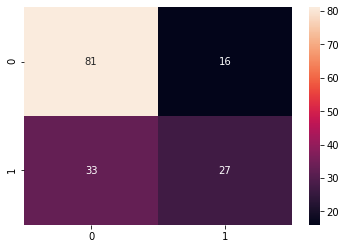

In [36]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)